In [16]:
%run ../odr_v3.1.ipynb
import matplotlib
matplotlib.rc('font', size=14) 

In [17]:
rel,u_d,i_d=txt2arr("1.1")

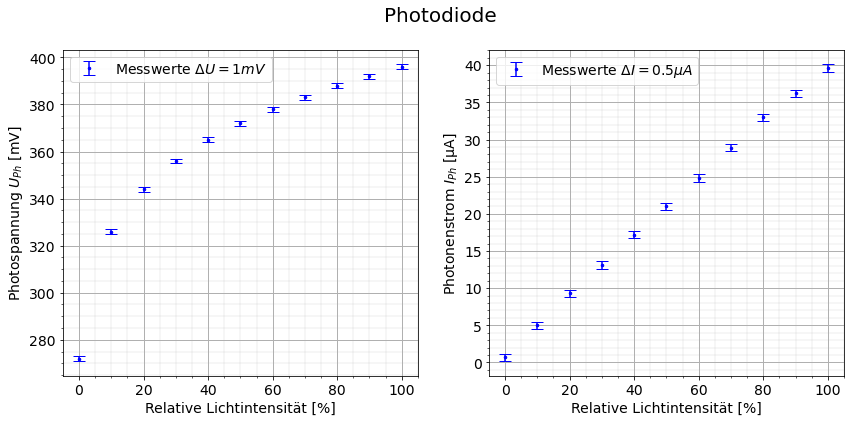

In [18]:
plt.figure(1)
plt.subplot(121)
plt.errorbar(x=rel,y=u_d,yerr=1,label="Messwerte $\Delta U=1mV$",fmt='.',c='b',capsize=6,ms=5)
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photospannung $U_{Ph}$ [mV]")
#plt.scale("log")
draw("")
plt.subplot(122)
plt.errorbar(x=rel,y=i_d,yerr=0.5,label="Messwerte $\Delta I=0.5µA$",fmt='.',c='b',capsize=6,ms=5)

#plt.errorbar(x=rel,y=i_d,label="Messwerte",fmt='x',ms=16,c='r')
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photonenstrom $I_{Ph}$ [µA]")

plt.suptitle('Photodiode',fontsize=20)
draw("",size=(14,6))
save("diode")

In [19]:
rel,i_t=txt2arr("1.2")

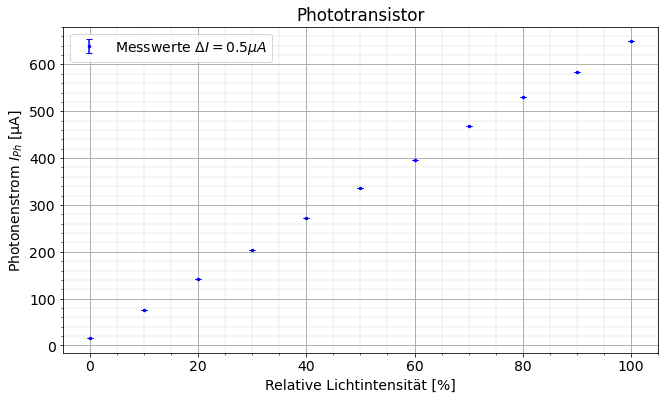

In [20]:
plt.errorbar(x=rel,y=i_t*1e3,yerr=0.5e-3,label="Messwerte $\Delta I=0.5µA$",fmt='.',c='b',capsize=3,ms=5)
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photonenstrom $I_{Ph}$ [µA]")
#plt.scale("log")
draw("Phototransistor")
save("transistor")

In [35]:
farbe,u=txt2arr("1.3",strings=[0])
#np.flip()

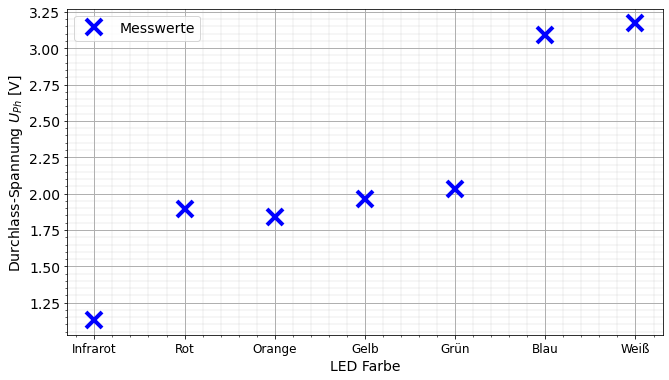

In [21]:
x=np.arange(0,len(u))
plt.errorbar(x=x,y=u,label="Messwerte",fmt='x',ms=16,mew=4,color="b")
plt.ylabel("Durchlass-Spannung $U_{Ph}$ [V]")
plt.xlabel("LED Farbe")
x_ticks_labels = ['Violett','Blau','Grün','Grün','Orange','Rot']
ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels(farbe, rotation='horizontal', fontsize=12)

draw()

No handles with labels found to put in legend.


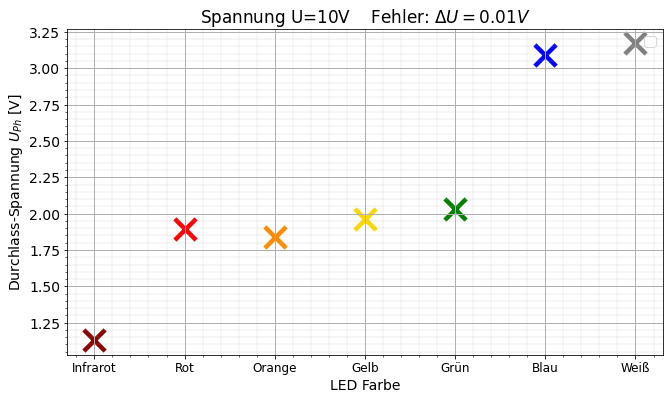

In [37]:
col=["darkred","red","darkorange","gold","green","blue","grey"]
x=np.arange(0,len(u))
for i in range(len(u)):
    plt.scatter(x[i], u[i],marker="x", c = col[i],s=10, linewidth = 30,label="") 
    
ax = plt.gca()
ax.set_xticks(x)
plt.ylabel("Durchlass-Spannung $U_{Ph}$ [V]")
plt.xlabel("LED Farbe")
ax.set_xticklabels(farbe, rotation='horizontal', fontsize=12)
draw("Spannung U=10V    Fehler: $\Delta U=0.01V$")
save("led")

In [39]:
print(np.flip.__doc__)


    Reverse the order of elements in an array along the given axis.

    The shape of the array is preserved, but the elements are reordered.

    .. versionadded:: 1.12.0

    Parameters
    ----------
    m : array_like
        Input array.
    axis : None or int or tuple of ints, optional
         Axis or axes along which to flip over. The default,
         axis=None, will flip over all of the axes of the input array.
         If axis is negative it counts from the last to the first axis.

         If axis is a tuple of ints, flipping is performed on all of the axes
         specified in the tuple.

         .. versionchanged:: 1.15.0
            None and tuples of axes are supported

    Returns
    -------
    out : array_like
        A view of `m` with the entries of axis reversed.  Since a view is
        returned, this operation is done in constant time.

    See Also
    --------
    flipud : Flip an array vertically (axis=0).
    fliplr : Flip an array horizontally (axis=1).